In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam 

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

In [71]:
df = pd.read_csv("data.csv")

In [72]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [73]:
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Feature'lar üzerinden istatistiksel bilgilere bakalım

df.describe()       

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
# Hedef değişkenimiz üzerinden istatistiksel bilgilere bakalım

df.groupby("diagnosis").agg(["min","max","std","mean"]) 

radius_mean                             texture_mean         \
                  min    max       std       mean          min    max   
diagnosis                                                               
B               6.981  17.85  1.780512  12.146524         9.71  33.81   
M              10.950  28.11  3.203971  17.462830        10.38  39.28   

                               perimeter_mean         ...  \
                std       mean            min    max  ...   
diagnosis                                             ...   
B          3.995125  17.914762          43.79  114.6  ...   
M          3.779470  21.604906          71.90  188.5  ...   

          concave points_worst           symmetry_worst                    \
                           std      mean            min     max       std   
diagnosis                                                                   
B                     0.035797  0.074444         0.1566  0.4228  0.041745   
M                     0.046308  0.182237         0.1565  0.6638  0.074685   

                    fractal_dimension_worst                              
               mean                     min     max       std      mean  
diagnosis                                                                
B          0.270246                 0.05521  0.1486  0.013804  0.079442  
M          0.323468                 0.05504  0.2075  0.021553  0.091530  

[2 rows x 120 columns]

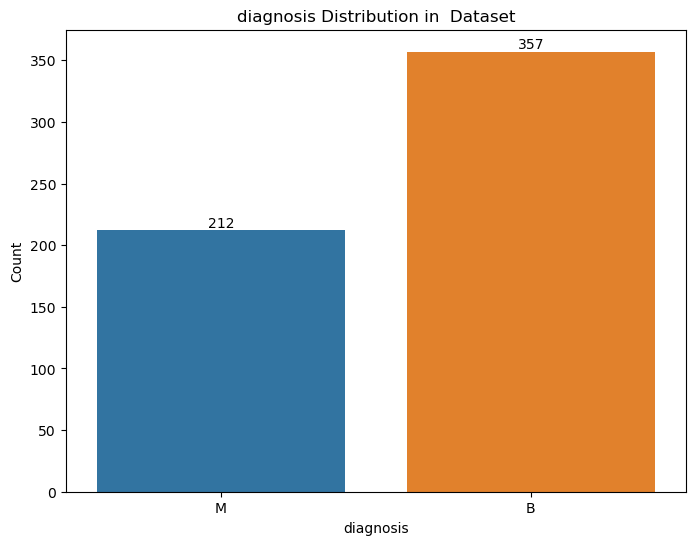

In [9]:
# Hedef değişkenimizin dağılımı

plt.figure(figsize=(8, 6))
ax=sns.countplot(data=df, x='diagnosis')
ax.bar_label(ax.containers[0])
plt.title('diagnosis Distribution in  Dataset')
plt.xlabel('diagnosis')
plt.ylabel('Count')
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [74]:
df_1 = df.copy()
df_2 = df.copy()

### Results

* 

* 

* 

* 

In [11]:
# target değişkenimizi numeric forma dönüştürüyoruz

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
le.fit_transform(df["diagnosis"])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [13]:
df["diagnosis"] = le.fit_transform(df["diagnosis"])

In [14]:
df["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

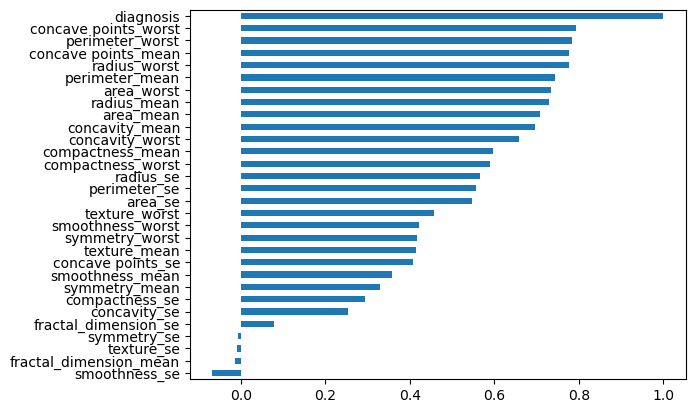

In [15]:
# target değişkeninin nümeric dönüşüm sonrası feature'lar ile korelasyonu 

df.corr()['diagnosis'][:-1].sort_values().plot.barh();

In [16]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Train-Test Split

In [18]:
X = df .drop("diagnosis", axis = 1)
y = df["diagnosis"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## ANN Model with  one hidden layer

#### ÖNEMLİ:
* Veri setinizdeki hedef değişkenler sınıf numaraları şeklinde ise, yani her sınıf bir sayı ile temsil ediliyorsa, **sparse_categorical_crossentropy** kayıp fonksiyonunu kullanmanız daha uygun olacaktır. Eğer one-hot kodlaması kullanılıyorsa, o zaman **categorical_crossentropy** tercih edilir. Biz taget değişkenimizin durumundan dolayı sparse_categorical_crossentropy loss fonksiyonunu tercih edicez 
* Eğer modelimizde categorical_crossentropy kullanıcak olsaydık önce **from tensorflow.keras.utils import to_categorical** import edip sonra da y verimiz üzerinde sırayla **y_train_encoded = to_categorical(y_train)** ve **y_test_encoded = to_categorical(y_test)** yapmamız gerekecekti

In [23]:

# Build the model (one hidden layer)
model = Sequential([
    Dense(units=10, activation="relu", input_dim=X_train.shape[1]),  # One hidden layer with 10 neurons
    Dense(units=3, activation="softmax")  # Output layer for 3 classes
    ])
opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(x=X_train, y=y_train, 
                    validation_data=(X_test, y_test),
                    batch_size=5, epochs=200)

Epoch 1/200
91/91 [==============================] - 1s 6ms/step - loss: 0.9634 - accuracy: 0.6286 - val_loss: 0.7966 - val_accuracy: 0.6228
Epoch 2/200
91/91 [==============================] - 0s 3ms/step - loss: 0.7206 - accuracy: 0.6659 - val_loss: 0.6089 - val_accuracy: 0.7719
Epoch 3/200
91/91 [==============================] - 0s 3ms/step - loss: 0.5816 - accuracy: 0.8198 - val_loss: 0.4967 - val_accuracy: 0.8596
Epoch 4/200
91/91 [==============================] - 0s 3ms/step - loss: 0.4869 - accuracy: 0.8571 - val_loss: 0.4093 - val_accuracy: 0.9123
Epoch 5/200
91/91 [==============================] - 0s 3ms/step - loss: 0.4160 - accuracy: 0.8681 - val_loss: 0.3452 - val_accuracy: 0.9298
Epoch 6/200
91/91 [==============================] - 0s 3ms/step - loss: 0.3614 - accuracy: 0.8813 - val_loss: 0.2972 - val_accuracy: 0.9474
Epoch 7/200
91/91 [==============================] - 0s 3ms/step - loss: 0.3205 - accuracy: 0.8901 - val_loss: 0.2619 - val_accuracy: 0.9386
Epoch 8/200
9

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                310       
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 343 (1.34 KB)
Trainable params: 343 (1.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Verimiz büyük ve kompleks bir form da olmadığı için Dropout ve Early stopping yöntemlerini uygulamadık

In [26]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)
    
    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [27]:
eval_metric(model, X_train, y_train, X_test, y_test)

4/4 [==============================] - 0s 3ms/step
Test Set:
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Train Set:
[[285   1]
 [  5 164]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       286
           1       0.99      0.97      0.98       169

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455



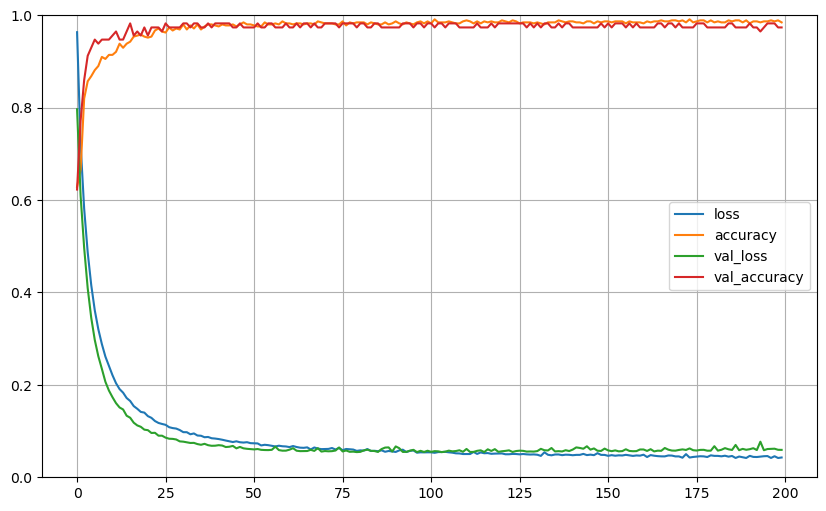

In [28]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


Accuracy during Training :
------------------------------------


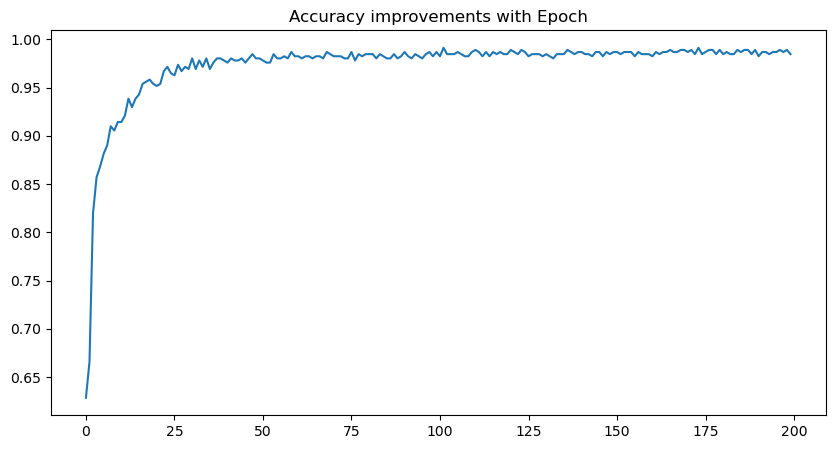

In [29]:
# Sadece Accuracy değişimine bakalım

print("\nAccuracy during Training :\n------------------------------------")

pd.DataFrame(history.history)["accuracy"].plot(figsize=(10, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

## Adaboost Model

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
X_train.shape

(455, 30)

In [41]:
X_test.shape

(114, 30)

In [42]:
# Train the AdaBoost model
base_estimator = DecisionTreeClassifier(max_depth=1)
ada = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
ada.fit(X_train, y_train)


C:\Users\bulen\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [43]:
def eval_metric(ada, X_train, y_train, X_test, y_test):
    y_train_pred = ada.predict(X_train)
    y_pred = ada.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [44]:

eval_metric(ada, X_train, y_train, X_test, y_test)

# Evaluate the model
y_pred = ada.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Test_Set
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Train_Set
[[286   0]
 [  0 169]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       1

In [45]:
preds = ada.predict(X_test)

In [46]:
preds

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [47]:
np.array(y_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [67]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


4/4 [==============================] - 0s 2ms/step
Training Accuracy: 0.9362637362637363
Test Accuracy: 0.956140350877193
4/4 [==============================] - 0s 2ms/step
Test_Set
[[70  1]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Train_Set
[[276  10]
 [ 19 150]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       286
           1       0.94      0.89      0.91       169

    accuracy                           0.94       455
   macro avg       0.94      0.93      0.93       455
weighted avg       0.94      0.94      0.94       455



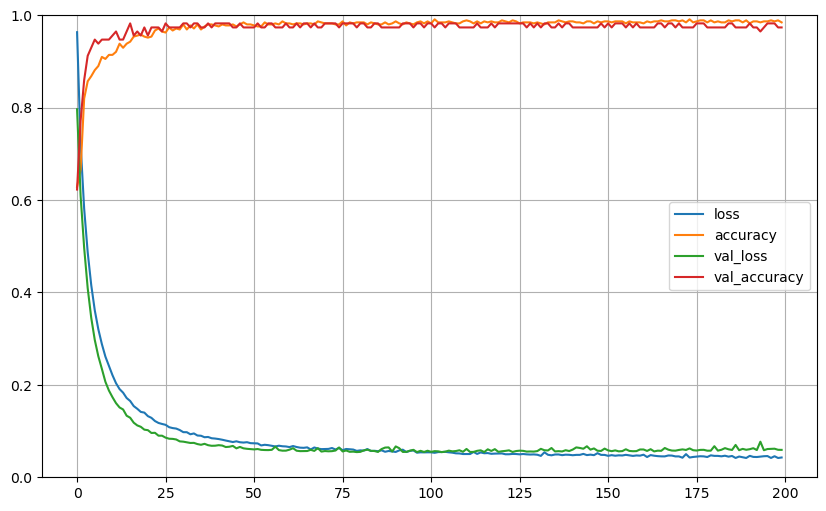

In [66]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load and prepare the dataset


X = df .drop("diagnosis", axis = 1)
y = df["diagnosis"]

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Keras model creation function
def create_ann_model():
    model = Sequential([
        Dense(units=10, activation="relu", input_dim=X_train.shape[1]),  # One hidden layer with 10 neurons
        Dense(units=1, activation="sigmoid")  # Output layer for binary classification
    ])
    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Custom Keras wrapper
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, epochs=100, batch_size=32, verbose=0):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model_ = None
        self.classes_ = None

    def fit(self, X, y, sample_weight=None):
        self.model_ = self.build_fn()
        if sample_weight is not None:
            self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose, sample_weight=sample_weight)
        else:
            self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        return (self.model_.predict(X) > 0.5).astype("int32").flatten()

    def predict_proba(self, X):
        probas = self.model_.predict(X)
        return np.hstack((1 - probas, probas))

# Wrap the Keras model
base_estimator = KerasClassifierWrapper(build_fn=create_ann_model, epochs=50, batch_size=10, verbose=0)

# Create the AdaBoost model with the SAMME algorithm
ada = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, algorithm='SAMME', random_state=42)

# Train the AdaBoost model
ada.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_train = ada.predict(X_train)
y_pred_test = ada.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

def eval_metric(ada, X_train, y_train, X_test, y_test):
    y_train_pred = ada.predict(X_train)
    y_pred = ada.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
eval_metric(ada, X_train, y_train, X_test, y_test)



4/4 [==============================] - 0s 3ms/step
Test_Set
[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Train_Set
[[165   4]
 [  1 285]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       169
           1       0.99      1.00      0.99       286

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



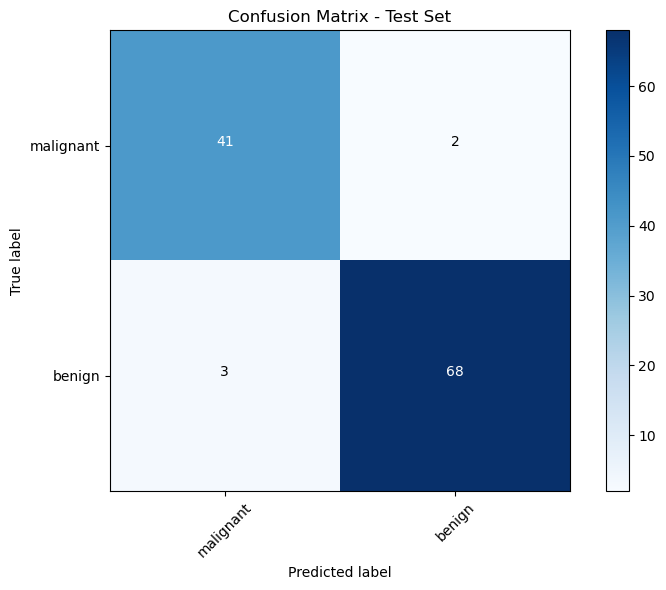

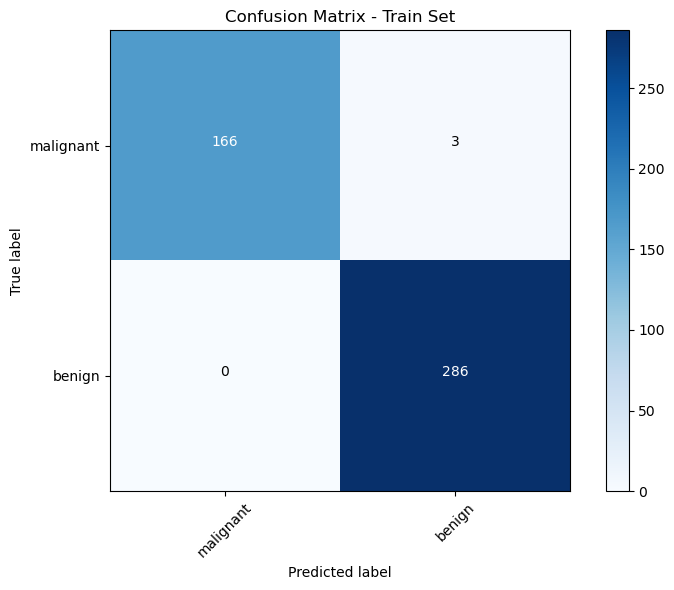

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load and prepare the dataset
X = df_1[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 
        'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 
        'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
        'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 
        'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
        'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
y = df_1['diagnosis']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Keras model creation function
def create_ann_model():
    model = Sequential([
        Dense(units=10, activation="relu", input_dim=X_train.shape[1]),  # One hidden layer with 10 neurons
        Dense(units=1, activation="sigmoid")  # Output layer for binary classification
    ])
    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Custom Keras wrapper
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, epochs=100, batch_size=32, verbose=0):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model_ = None
        self.classes_ = None
        self.history_ = None

    def fit(self, X, y, sample_weight=None):
        self.model_ = self.build_fn()
        if sample_weight is not None:
            self.history_ = self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose, sample_weight=sample_weight)
        else:
            self.history_ = self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        return (self.model_.predict(X) > 0.5).astype("int32").flatten()

    def predict_proba(self, X):
        probas = self.model_.predict(X)
        return np.hstack((1 - probas, probas))

# Wrap the Keras model
base_estimator = KerasClassifierWrapper(build_fn=create_ann_model, epochs=50, batch_size=10, verbose=0)

# Create the AdaBoost model with the SAMME algorithm
ada = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, algorithm='SAMME', random_state=42)

# Train the AdaBoost model
ada.fit(X_train, y_train)

# Make predictions and evaluate the model
#y_pred_train = ada.predict(X_train)
#y_pred_test = ada.predict(X_test)

#print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
#print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

# Evaluation function
def eval_metric(ada, X_train, y_train, X_test, y_test):
    y_train_pred = ada.predict(X_train)
    y_pred = ada.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
eval_metric(ada, X_train, y_train, X_test, y_test)

# Plot the training history
def plot_history(history):
    history_df = pd.DataFrame(history.history)
    history_df.plot(figsize=(10, 6))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.title("Training History")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy / Loss")
    plt.show()

# Plot the training history of the last base estimator
if base_estimator.history_ is not None:
    plot_history(base_estimator.history_)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Plotting confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm, classes=data.target_names, title='Confusion Matrix - Test Set')

# Plotting confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_pred_train)
plot_confusion_matrix(cm_train, classes=data.target_names, title='Confusion Matrix - Train Set')


4/4 [==============================] - 0s 0s/step
Training Accuracy: 1.0
Test Accuracy: 0.9736842105263158
4/4 [==============================] - 0s 3ms/step
Test_Set
[[42  1]
 [ 2 69]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Train_Set
[[169   0]
 [  0 286]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       286

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



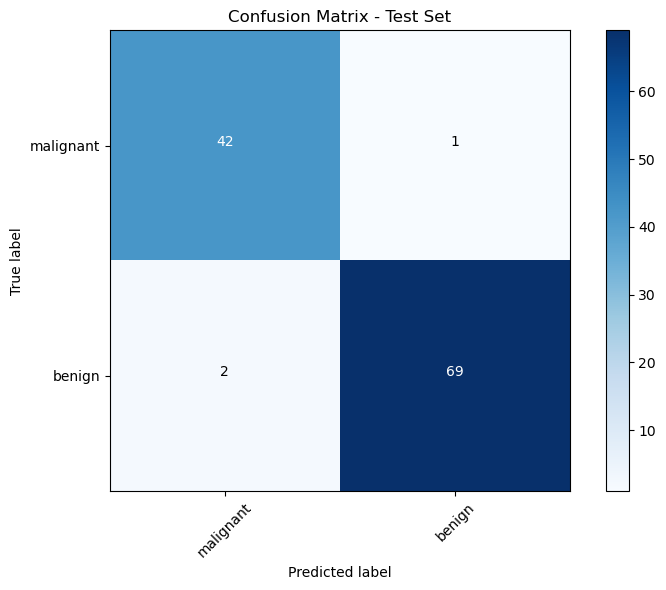

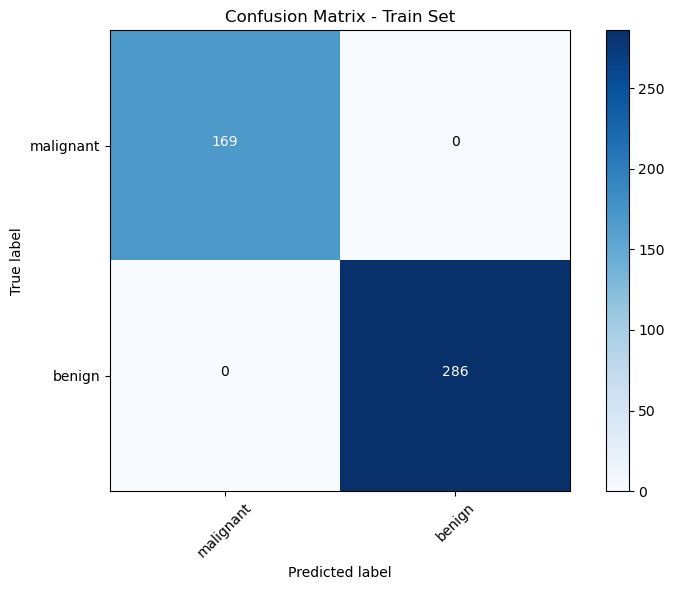

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load and prepare the dataset

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Keras model creation function
def create_ann_model():
    model = Sequential([
        Dense(units=10, activation="relu", input_dim=X_train.shape[1]),  # One hidden layer with 10 neurons
        Dense(units=1, activation="sigmoid")  # Output layer for binary classification
    ])
    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Custom Keras wrapper
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, epochs=100, batch_size=32, verbose=0):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model_ = None
        self.classes_ = None
        self.history_ = None

    def fit(self, X, y, sample_weight=None):
        self.model_ = self.build_fn()
        if sample_weight is not None:
            self.history_ = self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose, sample_weight=sample_weight)
        else:
            self.history_ = self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        return (self.model_.predict(X) > 0.5).astype("int32").flatten()

    def predict_proba(self, X):
        probas = self.model_.predict(X)
        return np.hstack((1 - probas, probas))

# Wrap the Keras model
base_estimator = KerasClassifierWrapper(build_fn=create_ann_model, epochs=50, batch_size=10, verbose=0)

# Create the AdaBoost model with the SAMME algorithm
ada = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, algorithm='SAMME', random_state=42)

# Train the AdaBoost model
ada.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_train = ada.predict(X_train)
y_pred_test = ada.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

# Evaluation function
def eval_metric(ada, X_train, y_train, X_test, y_test):
    y_train_pred = ada.predict(X_train)
    y_pred = ada.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
eval_metric(ada, X_train, y_train, X_test, y_test)

# Plot the training history
def plot_history(history):
    history_df = pd.DataFrame(history.history)
    history_df.plot(figsize=(10, 6))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.title("Training History")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy / Loss")
    plt.show()

# Plot the training history of the last base estimator
if base_estimator.history_ is not None:
    plot_history(base_estimator.history_)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Plotting confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm, classes=data.target_names, title='Confusion Matrix - Test Set')

# Plotting confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_pred_train)
plot_confusion_matrix(cm_train, classes=data.target_names, title='Confusion Matrix - Train Set')
